# Diabetes Prediction: Random Forest Classifier

## Importing Libraries

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix


## Importing Dataset

In [2]:
# Load the dataset
data = pd.read_csv("Diabetes.csv")  # Ensure the path is correct
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Preprocessing

In [3]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:,1:3])


In [5]:
print(x)

[['Female' 80.0 0.0 ... 25.19 6.6 140]
 ['Female' 54.0 0.0 ... 27.32 6.6 80]
 ['Male' 28.0 0.0 ... 27.32 5.7 158]
 ...
 ['Male' 66.0 0.0 ... 27.83 5.7 155]
 ['Female' 24.0 0.0 ... 35.42 4.0 100]
 ['Female' 57.0 0.0 ... 22.43 6.6 90]]


In [6]:
x = data.to_numpy()

In [7]:
categorical_features_index = [0, 4] 

In [11]:
# Create the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features_index)  # Encode gender and smoking_history
    ],
    remainder='passthrough'  # Keep the other columns (like 'age' and 'bmi')
)

# Apply the transformation
x_encoded = np.array(ct.fit_transform(x))

# Display the encoded output
print(x_encoded)


[[1.0 0.0 0.0 ... 6.6 140 0]
 [1.0 0.0 0.0 ... 6.6 80 0]
 [0.0 1.0 0.0 ... 5.7 158 0]
 ...
 [0.0 1.0 0.0 ... 5.7 155 0]
 [1.0 0.0 0.0 ... 4.0 100 0]
 [1.0 0.0 0.0 ... 6.6 90 0]]


In [12]:
# Encoding the dependent variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
print(y)

[0 0 0 ... 0 0 0]


## Splitting the dataset into the Training and Test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded,y, test_size = 0.2, random_state = 0)

In [15]:
print(x_train)

[[1.0 0.0 0.0 ... 6.2 159 0]
 [1.0 0.0 0.0 ... 6.0 130 0]
 [1.0 0.0 0.0 ... 4.5 130 0]
 ...
 [0.0 1.0 0.0 ... 9.0 145 1]
 [1.0 0.0 0.0 ... 5.8 90 0]
 [1.0 0.0 0.0 ... 4.5 158 0]]


In [16]:
print(y_train)

[0 0 0 ... 1 0 0]


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
print(x_train)

[[ 0.84113286 -0.84087291 -0.01224837 ...  0.62804769  0.51774497
  -0.30471525]
 [ 0.84113286 -0.84087291 -0.01224837 ...  0.44130554 -0.19569252
  -0.30471525]
 [ 0.84113286 -0.84087291 -0.01224837 ... -0.95926057 -0.19569252
  -0.30471525]
 ...
 [-1.18887283  1.18924035 -0.01224837 ...  3.24243778  0.17332687
   3.28175235]
 [ 0.84113286 -0.84087291 -0.01224837 ...  0.2545634  -1.17974423
  -0.30471525]
 [ 0.84113286 -0.84087291 -0.01224837 ... -0.95926057  0.49314367
  -0.30471525]]


In [19]:
print(x_test)

[[ 0.84113286 -0.84087291 -0.01224837 ... -0.67914735  0.05032041
  -0.30471525]
 [-1.18887283  1.18924035 -0.01224837 ... -0.67914735 -0.9337313
  -0.30471525]
 [ 0.84113286 -0.84087291 -0.01224837 ...  1.00153199 -1.30275069
  -0.30471525]
 ...
 [ 0.84113286 -0.84087291 -0.01224837 ... -0.67914735  0.49314367
  -0.30471525]
 [ 0.84113286 -0.84087291 -0.01224837 ... -1.89297131  0.17332687
  -0.30471525]
 [-1.18887283  1.18924035 -0.01224837 ...  0.16119232  0.4193398
  -0.30471525]]


## Training the Random Forest Classifier model on the Training set

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

## Predicting a new result

In [21]:
# Make predictions
y_pred = rf_classifier.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get a classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18297
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## Predicting the Test set results

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18297
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



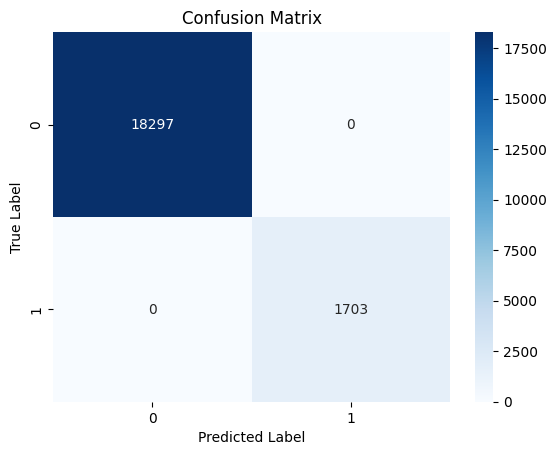

In [23]:
# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


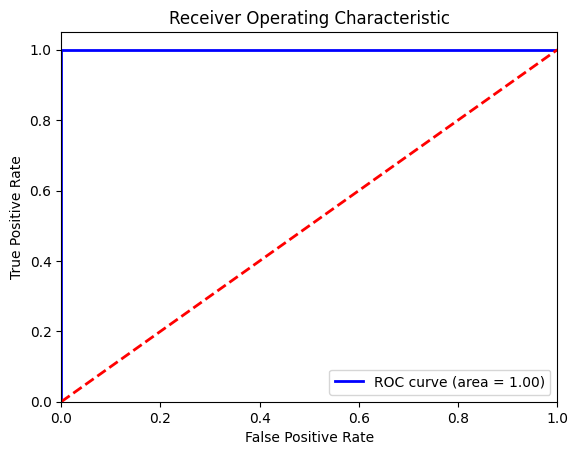

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
